In [0]:
database = "boogaloo-capstone-human-life"
tableLE_All="dbo.Model_Data"
user = "bglcap"
password  = "48Gheq0Iz9t"
server = "gen10-data-fundamentals-22-02-sql-server.database.windows.net"

In [0]:
Model_Data=spark.read.format("jdbc").option("url", f"jdbc:sqlserver://{server}:1433;databaseName={database};") \
    .option("dbtable", tableLE_All) \
    .option("user", user) \
    .option("password", password) \
    .option("driver", "com.microsoft.sqlserver.jdbc.SQLServerDriver") \
    .load()


In [0]:
LE_All_Data_cleaned_pandas=Model_Data.toPandas()
LE_dep=LE_All_Data_cleaned_pandas["Life Expectancy"]
LE_ind=LE_All_Data_cleaned_pandas.drop(columns={"Life Expectancy"},inplace=False)

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
zscore = ss.fit_transform(LE_ind)
LE_ind_normalized = pd.DataFrame(zscore, columns=LE_ind.columns.tolist())

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(LE_ind, LE_dep,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test,y_test)

Out[5]: 0.7582572816472044

In [0]:
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(LE_ind_normalized, LE_dep,random_state=42)

reg_normal = LinearRegression().fit(X_train_normal, y_train_normal)

reg_normal.score(X_test_normal,y_test_normal)

Out[6]: 0.7396181530897463

In [0]:
predictions=reg.predict(X_test)
predictions_normal=reg_normal.predict(X_test_normal)

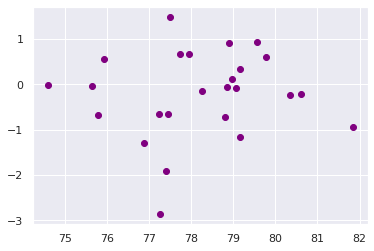

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
sns.set_theme(style="darkgrid", palette='pastel')

ax=plt.scatter(predictions,y_test-predictions,c='purple')

plt.show()

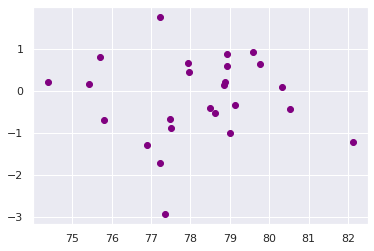

In [0]:
ax_normal=plt.scatter(predictions_normal,y_test_normal-predictions_normal,c='purple')

plt.show()

In [0]:
coefficients_list=reg.coef_
coefficients_normal_list=reg_normal.coef_
print(coefficients_list)
print(coefficients_normal_list)
LE_ind.info()

[ 1.42324288e+01 -1.42324288e+01 3.78343014e+00 -2.02447431e+00
 -4.91452560e+00 1.81424039e+01 -7.38450599e+00 4.91293157e+00
 -1.25152597e+01 2.36595123e+00 7.57890849e-05 5.34658921e+00]
[ 3.31554495e+13 3.31554495e+13 -2.67778569e+11 -1.97432203e+11
 -6.09561390e+10 -1.17993272e+11 -3.01588207e+10 -5.85768584e+10
 -6.88383254e+10 2.31231689e-01 7.29980469e-01 1.79443359e-01]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Male 100 non-null float64
 1 Female 100 non-null float64
 2 White 100 non-null float64
 3 Black or African American 100 non-null float64
 4 American Indian and Alaska Native 100 non-null float64
 5 Asian 100 non-null float64
 6 Native Hawaiian and other Pacific Islander 100 non-null float64
 7 Other 100 non-null float64
 8 Multiracial 100 non-null float64
 9 Hispanic or Latino 100 non-null float64
 10 Median Household Income 100 non-null float64
 11 Percent Insured 100 non-null float64
dtypes: float64(12)
memory usage: 9.5 KB

In [0]:
from sklearn.svm import SVR
svr = SVR().fit(X_train_normal, y_train_normal)
svr_predictions=svr.predict(X_test_normal)
svr.score(X_test_normal,y_test_normal)

Out[11]: 0.7458823995779402

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
ml = svm.SVR()
param_grid = {'C': [ 5,6,7,8,8.5,9.5,9,10,10.5,11,11.5,12,13,14,15], 
              'gamma': [.2,.25,.6,.5,.35,.4,.3],
              'kernel': ['rbf'],
              'epsilon':[.1,.15,.2,.3,.05]}   

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=5)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_normal, y_train_normal)
print(grid_search.best_params_)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits
{'C': 15, 'epsilon': 0.2, 'gamma': 0.25, 'kernel': 'rbf'}

In [0]:
svr_predictions1=grid_search.predict(X_test_normal)
grid_search.score(X_test_normal,y_test_normal)

Out[13]: 0.9592328189484279

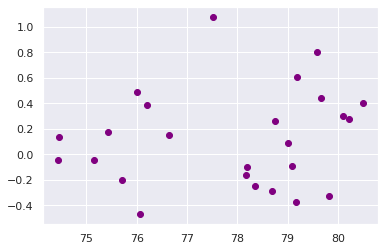

In [0]:
ax_svr=plt.scatter(svr_predictions1,y_test_normal-svr_predictions1,c='purple')

plt.show()

In [0]:
#LE_restricted_Data=LE_All_Data_cleaned[["Male","White","Black or African American","American Indian and Alaska Native","Asian","Native Hawaiian and other Pacific Islander","Other","Multiracial","Hispanic or Latino","Median Household Income","Percent Insured","Life Expectancy"]]



LE_restricted_Data_pandas=LE_All_Data_cleaned_pandas[["Male","White","Black or African American","American Indian and Alaska Native","Asian","Native Hawaiian and other Pacific Islander","Other","Multiracial","Hispanic or Latino","Median Household Income","Percent Insured","Life Expectancy"]]
LE_restricted_Data_pandas["Median Household Income"]=LE_restricted_Data_pandas["Median Household Income"]/100000.0
LE_restricted_dep=LE_restricted_Data_pandas["Life Expectancy"]
LE_restricted_ind=LE_restricted_Data_pandas.drop(columns={"Life Expectancy"},inplace=False)

<command-668345501455942>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 LE_restricted_Data_pandas["Median Household Income"]=LE_restricted_Data_pandas["Median Household Income"]/100000.0

In [0]:
zscore_restricted = ss.fit_transform(LE_restricted_ind)
LE_restricted_ind_normalized = pd.DataFrame(zscore_restricted, columns=LE_restricted_ind.columns.tolist())

In [0]:
X_restricted_train, X_restricted_test, y_restricted_train, y_restricted_test = train_test_split(LE_restricted_ind, LE_restricted_dep,random_state=0)

restricted_reg = LinearRegression().fit(X_restricted_train, y_restricted_train)

restricted_reg.score(X_restricted_test,y_restricted_test)

Out[17]: 0.7779725688033589

In [0]:
X_restricted_normal_train, X_restricted_normal_test, y_restricted_normal_train, y_restricted_normal_test = train_test_split(LE_restricted_ind_normalized, LE_restricted_dep,random_state=42)

restricted_normal_reg = LinearRegression().fit(X_restricted_normal_train, y_restricted_normal_train)

restricted_normal_reg.score(X_restricted_normal_test,y_restricted_normal_test)

Out[18]: 0.7582572816494836

In [0]:
restricted_coefficients_list=restricted_reg.coef_
print(restricted_coefficients_list)
restricted_normal_coefficients_list=restricted_normal_reg.coef_
print(restricted_normal_coefficients_list)
LE_restricted_ind.info()

[20.25773761 3.90814561 -1.5175124 -6.0899499 9.88870921 -4.2708026
 1.2856056 -3.20419553 3.72724026 9.77049144 7.18527255]
[ 0.22039698 0.1318969 -0.44806542 -0.22211601 0.86384713 -0.1453202
 0.0603171 -0.49966256 0.24341559 0.76335777 0.16191326]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Male 100 non-null float64
 1 White 100 non-null float64
 2 Black or African American 100 non-null float64
 3 American Indian and Alaska Native 100 non-null float64
 4 Asian 100 non-null float64
 5 Native Hawaiian and other Pacific Islander 100 non-null float64
 6 Other 100 non-null float64
 7 Multiracial 100 non-null float64
 8 Hispanic or Latino 100 non-null float64
 9 Median Household Income 100 non-null float64
 10 Percent Insured 100 non-null float64
dtypes: float64(11)
memory usage: 8.7 KB

In [0]:
LE_restricted_Data_pandas.corr()

Out[20]:

,Male,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and other Pacific Islander,Other,Multiracial,Hispanic or Latino,Median Household Income,Percent Insured,Life Expectancy
Male,1.000000,0.421586,-0.758323,0.542446,-0.036162,0.061100,-0.041662,0.125291,0.020933,0.174721,-0.060589,0.300603
White,0.421586,1.000000,-0.524718,0.012532,-0.725393,-0.604654,-0.301828,-0.631029,-0.235524,-0.265217,0.118463,-0.024882
Black or African American,-0.758323,-0.524718,1.000000,-0.328295,-0.107826,-0.179416,-0.046143,-0.233528,-0.133683,-0.212975,-0.240819,-0.464772
American Indian and Alaska Native,0.542446,0.012532,-0.328295,1.000000,-0.099909,0.003158,0.006392,0.171748,0.137504,-0.025325,-0.326930,-0.075283
Asian,-0.036162,-0.725393,-0.107826,-0.099909,1.000000,0.892455,0.260345,0.892877,0.213100,0.535867,0.244566,0.456682
Native Hawaiian and other Pacific Islander,0.061100,-0.604654,-0.179416,0.003158,0.892455,1.000000,-0.062094,0.948859,0.006673,0.298637,0.161594,0.248467
Other,-0.041662,-0.301828,-0.046143,0.006392,0.260345,-0.062094,1.000000,0.030805,0.850279,0.288388,-0.080866,0.379231
Multiracial,0.125291,-0.631029,-0.233528,0.171748,0.892877,0.948859,0.030805,1.000000,0.086110,0.370191,0.098174,0.282104
Hispanic or Latino,0.020933,-0.235524,-0.133683,0.137504,0.213100,0.006673,0.850279,0.086110,1.000000,0.154219,-0.305603,0.310126
Median Household Income,0.174721,-0.265217,-0.212975,-0.025325,0.535867,0.298637,0.288388,0.370191,0.154219,1.000000,0.387855,0.765060


In [0]:
svr_restricted_param_grid = {'C': [ 5,6,7,8,8.5,9.5,9,10,10.5,11,11.5,12,13,14,15], 
              'gamma': [.2,.25,.6,.5,.35,.4,.3],
              'kernel': ['rbf'],
              'epsilon':[.1,.15,.2,.3,.05]}   

svr_restricted_grid = GridSearchCV(ml, svr_restricted_param_grid, refit = True, verbose = 1,cv=5)
  
# fitting the model for grid search
grid_search_restricted=svr_restricted_grid.fit(X_restricted_normal_train, y_restricted_normal_train)
print(grid_search_restricted.best_params_)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits
{'C': 15, 'epsilon': 0.2, 'gamma': 0.25, 'kernel': 'rbf'}

In [0]:
svr_restricted_predictions=grid_search_restricted.predict(X_restricted_normal_test)
grid_search_restricted.score(X_restricted_normal_test,y_restricted_normal_test)

Out[22]: 0.9584617435482025

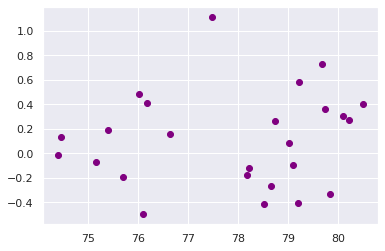

In [0]:
ax_svr_restricted=plt.scatter(svr_restricted_predictions,y_restricted_normal_test-svr_restricted_predictions,c='purple')

plt.show()

In [0]:
# LE_demographic_Data=LE_All_Data_cleaned[["Male","White","Black or African American","American Indian and Alaska Native","Asian","Native Hawaiian and other Pacific Islander","Other","Multiracial","Hispanic or Latino","Life Expectancy"]]



LE_demographic_Data_pandas=LE_All_Data_cleaned_pandas[["Male","White","Black or African American","American Indian and Alaska Native","Asian","Native Hawaiian and other Pacific Islander","Other","Multiracial","Hispanic or Latino","Life Expectancy"]]
LE_demographic_dep=LE_demographic_Data_pandas["Life Expectancy"]
LE_demographic_ind=LE_demographic_Data_pandas.drop(columns={"Life Expectancy"},inplace=False)

In [0]:
zscore_demographic = ss.fit_transform(LE_demographic_ind)
LE_demographic_ind_normalized = pd.DataFrame(zscore_demographic, columns=LE_demographic_ind.columns.tolist())

X_demographic_train, X_demographic_test, y_demographic_train, y_demographic_test = train_test_split(LE_demographic_ind, LE_demographic_dep,random_state=42)

demographic_reg = LinearRegression().fit(X_demographic_train, y_demographic_train)

demo_score=demographic_reg.score(X_demographic_test,y_demographic_test)

X_demographic_normal_train, X_demographic_normal_test, y_demographic_normal_train, y_demographic_normal_test = train_test_split(LE_demographic_ind_normalized, LE_demographic_dep,random_state=0)

demographic_normal_reg = LinearRegression().fit(X_demographic_normal_train, y_demographic_normal_train)

normal_demo_score=demographic_normal_reg.score(X_demographic_normal_test,y_demographic_normal_test)
print(demo_score)
print(normal_demo_score)
demographic_coefficients_list=demographic_reg.coef_
print(demographic_coefficients_list)
demographic_normal_coefficients_list=demographic_normal_reg.coef_
print(demographic_normal_coefficients_list)
LE_demographic_ind.info()


0.5427924363774815
0.6829225433627213
[ 55.22367213 10.50063719 3.67073797 2.65810477 52.47207573
 -64.01768589 8.60422955 -13.88809934 0.57399024]
[ 0.15388255 -0.04969455 -0.90680735 -0.19812508 2.68134812 -1.58750254
 -0.3241559 -0.65514016 0.16812537]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Male 100 non-null float64
 1 White 100 non-null float64
 2 Black or African American 100 non-null float64
 3 American Indian and Alaska Native 100 non-null float64
 4 Asian 100 non-null float64
 5 Native Hawaiian and other Pacific Islander 100 non-null float64
 6 Other 100 non-null float64
 7 Multiracial 100 non-null float64
 8 Hispanic or Latino 100 non-null float64
dtypes: float64(9)
memory usage: 7.2 KB

In [0]:
svr_demographic_param_grid = {'C': [ 5,6,7,8,8.5,9.5,9,10,10.5,11,11.5,12,13,14,15], 
              'gamma': [.2,.25,.6,.5,.35,.4,.3],
              'kernel': ['rbf'],
              'epsilon':[.1,.15,.2,.3,.05]}   

svr_demographic_grid = GridSearchCV(ml, svr_demographic_param_grid, refit = True, verbose = 1,cv=5)
  
# fitting the model for grid search
grid_search_demographic=svr_demographic_grid.fit(X_demographic_normal_train, y_demographic_normal_train)
print(grid_search_demographic.best_params_)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits
{'C': 15, 'epsilon': 0.1, 'gamma': 0.6, 'kernel': 'rbf'}

In [0]:
svr_demographic_predictions=grid_search_demographic.predict(X_demographic_normal_test)
grid_search_demographic.score(X_demographic_normal_test,y_demographic_normal_test)

Out[27]: 0.9672290735486474

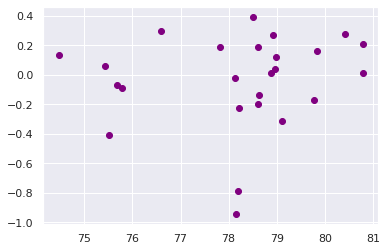

In [0]:
ax_svr_demo=plt.scatter(svr_demographic_predictions,y_demographic_normal_test-svr_demographic_predictions,c='purple')

plt.show()